In [1]:
library(fmsb)
library(ggplot2)
library(scatterplot3d)
library(rgl)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'rgl' was built under R version 3.6.2"

# Middle-Square RNG

## (a)

In [2]:
m = 10000
mid_square_rng = function(n,x0){
    r = NULL
    for (i in 1:n){
        r = c(r, x0/m)
        x0 = as.numeric(substr(as.character(x0^2*10^(8-nchar(as.character(x0^2)))),3,6))
    }
    return(r)
}

## (b)

[1] 0.1010 0.2010 0.4010 0.0801 0.1601 0.6320 0.9424 0.8117 0.8856 0.4287
[11] 0.3783 0.3110 0.7210 0.9841 0.8452 0.4363 0.0357 0.7449 0.4876 0.7753

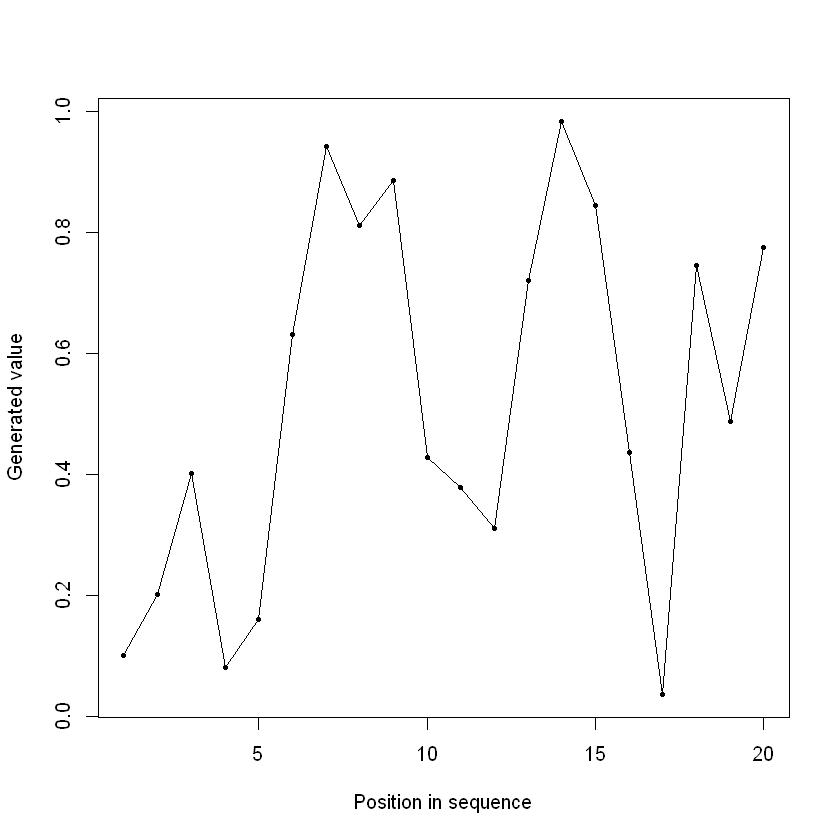

In [3]:
N = 20
x0 = 1010
mid_square_rng(N,x0)
plot(mid_square_rng(N,x0), cex = .5, pch = 16, xlab = 'Position in sequence', ylab = 'Generated value')
lines(mid_square_rng(N,x0))

## (c)

[1] 0.6100 0.2100 0.1000 0.0009 0.0001 0.0007 0.0009 0.0001 0.0007 0.0009
[11] 0.0001 0.0007 0.0009 0.0001 0.0007 0.0009 0.0001 0.0007 0.0009 0.0001

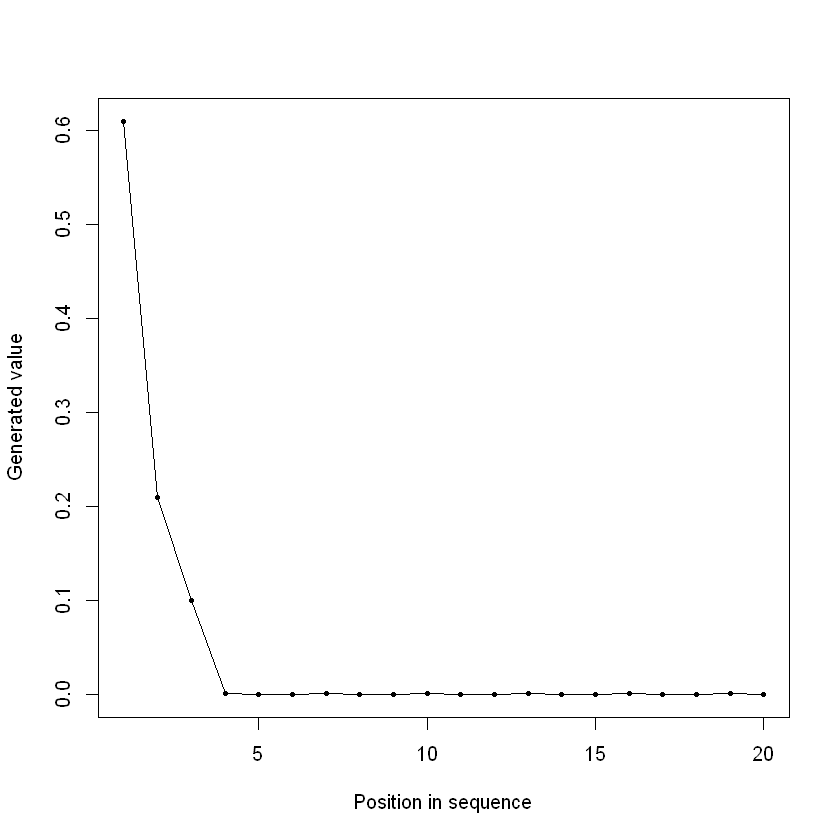

In [4]:
N = 20
x0 = 6100
mid_square_rng(N,x0)
plot(mid_square_rng(N,x0), cex = .5, pch = 16, xlab = 'Position in sequence', ylab = 'Generated value')
lines(mid_square_rng(N,x0))

## (d)

[1] 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792
[11] 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792 0.3792

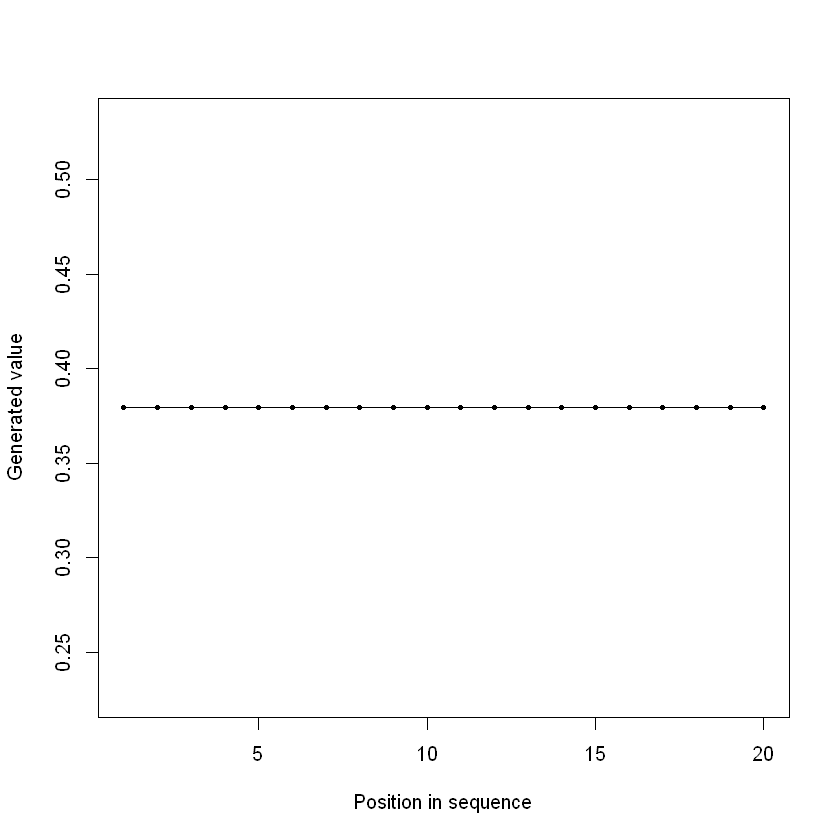

In [5]:
N = 20
x0 = 3792
mid_square_rng(N,x0)
plot(mid_square_rng(N,x0), cex = .5, pch = 16, xlab = 'Position in sequence', ylab = 'Generated value')
lines(mid_square_rng(N,x0))

**Conclusion:**
- When $X_0=1010$, the RNG works.
- When $X_0=6100$, the RNG doesn't work, it works till generates $1000$ and then all numbers after are the same.
- When $X_0=3792$, the RNG doesn't work, it generate the same numbers all the time.

## (e)

If $X_0\in \{0,...,9999\}$, then $X_0^2<(X_0+1)^2\leq 10000^2$, $10000^2$ has 9 digits and is the minimum in 9-digit number. Therefore, $X_0$ can only have at most 8 digits.

## (f)

Based on part (c), if the RNG generates numbers like $1000$, $1000^2$ after padded to be 8 digits long still has no numbers in the middle.

## (g)

Based on part (d), there is scenario that the middle 4 digits of a squared number is still the original number.

$3792^2 = 14379264$

# Lehmer’s RNG

## (a)

In [6]:
lehmer_rng = function(n,m,a,b,x0){
    r = NULL
    for (i in 1:n){
        r = c(r, x0)
        x0 = ((a*x0+b) %% m )
    }
    return(r)
}

## (b)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a=3,1,4,13,8,9,12,5,0,1,4,13,8,9,12,5,0
a=4,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
a=5,1,6,15,12,13,2,11,8,9,14,7,4,5,10,3,0
a=6,1,7,11,3,3,3,3,3,3,3,3,3,3,3,3,3
a=7,1,8,9,0,1,8,9,0,1,8,9,0,1,8,9,0
a=8,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
a=9,1,10,11,4,5,14,15,8,9,2,3,12,13,6,7,0
a=10,1,11,15,7,7,7,7,7,7,7,7,7,7,7,7,7


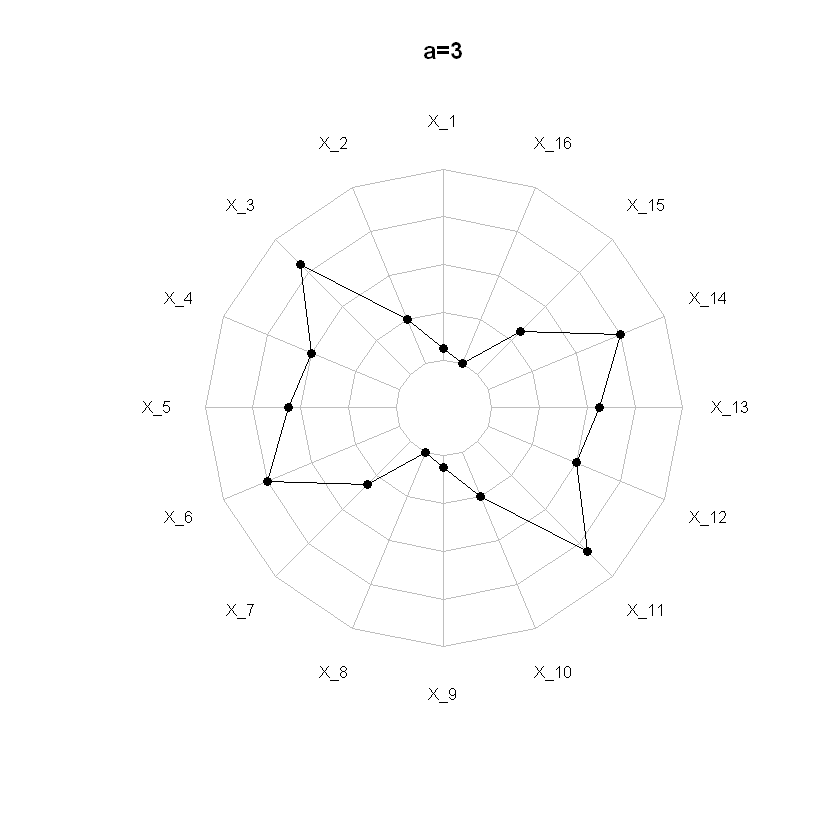

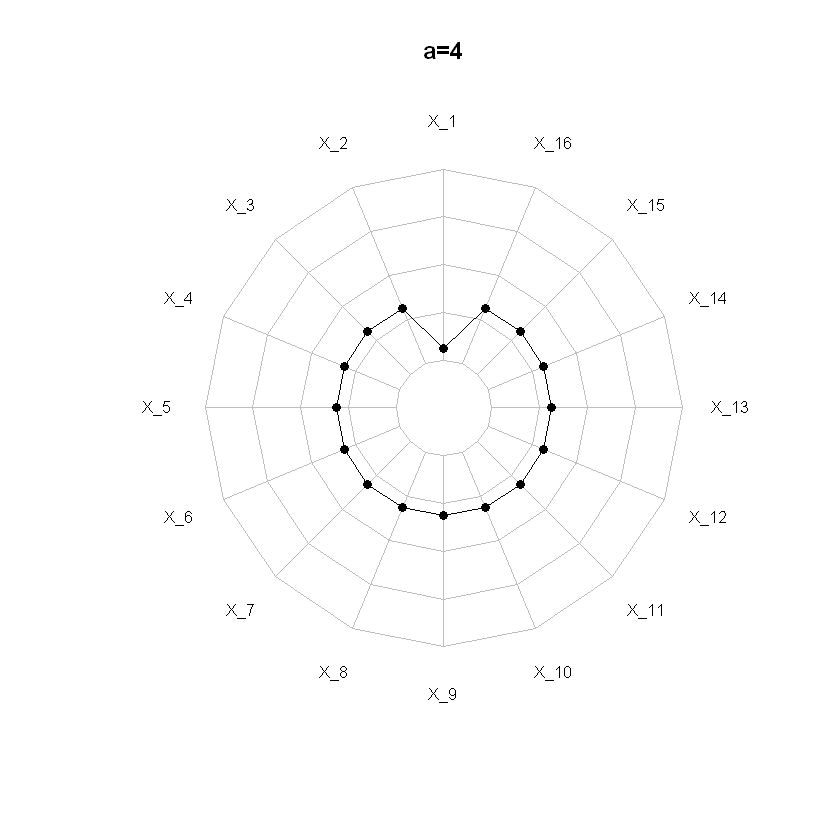

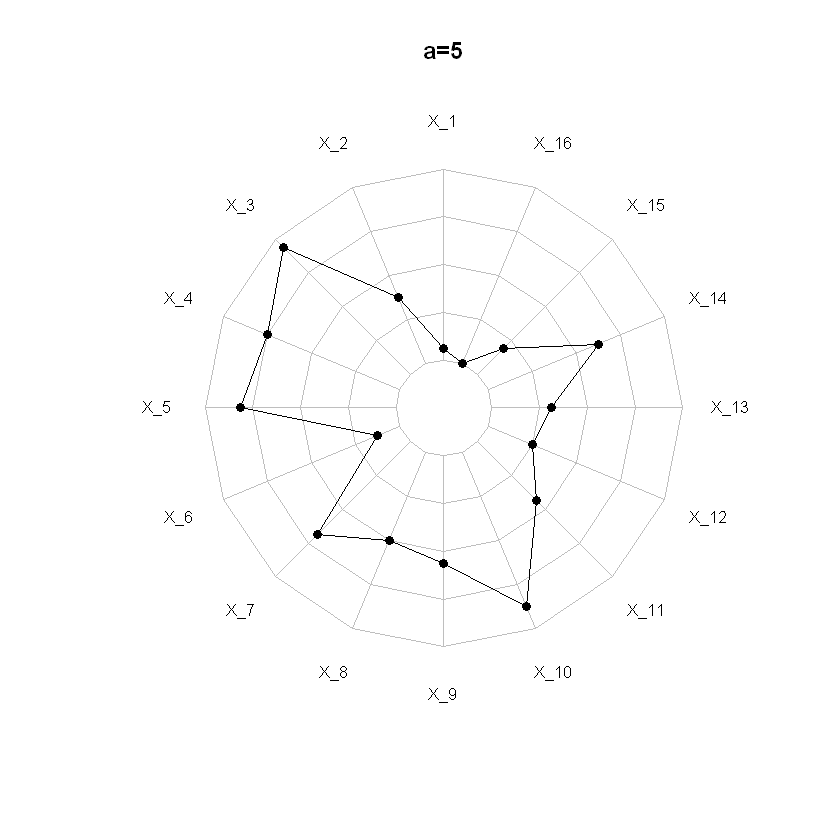

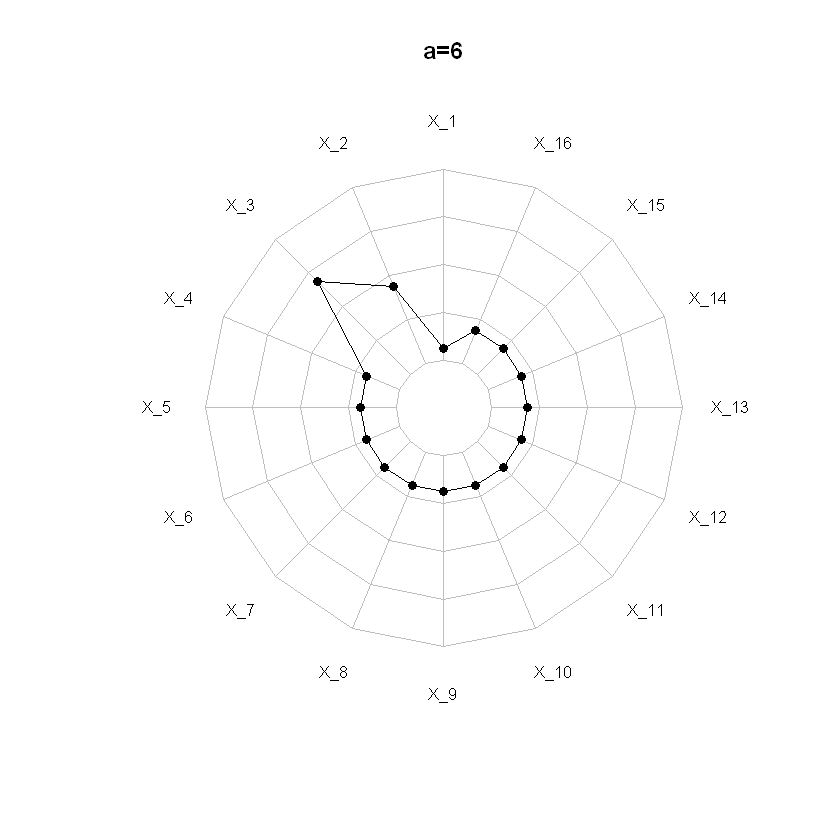

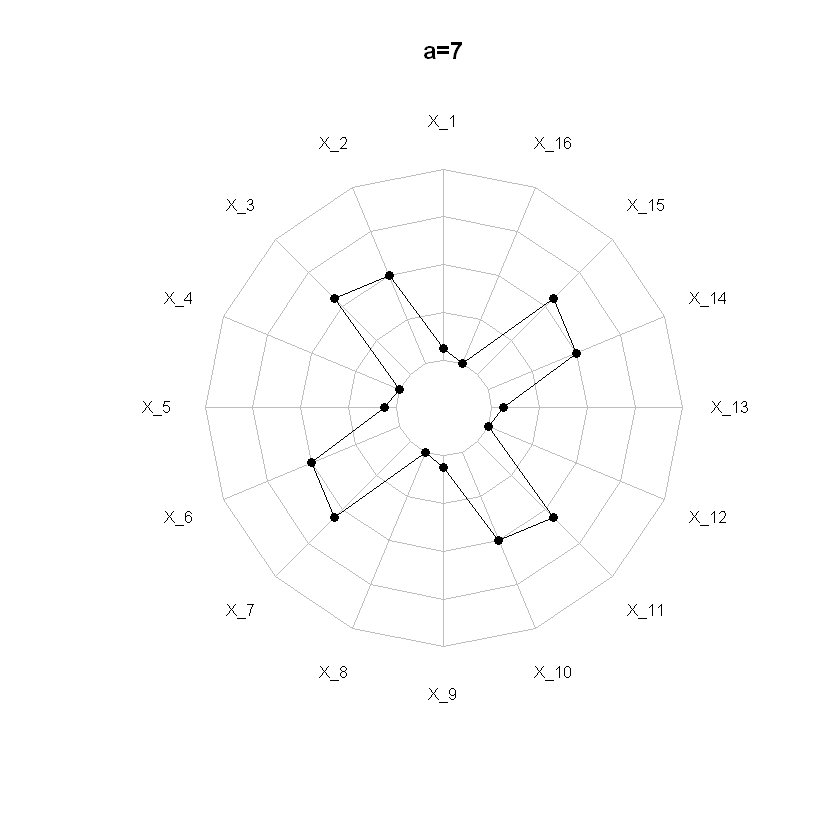

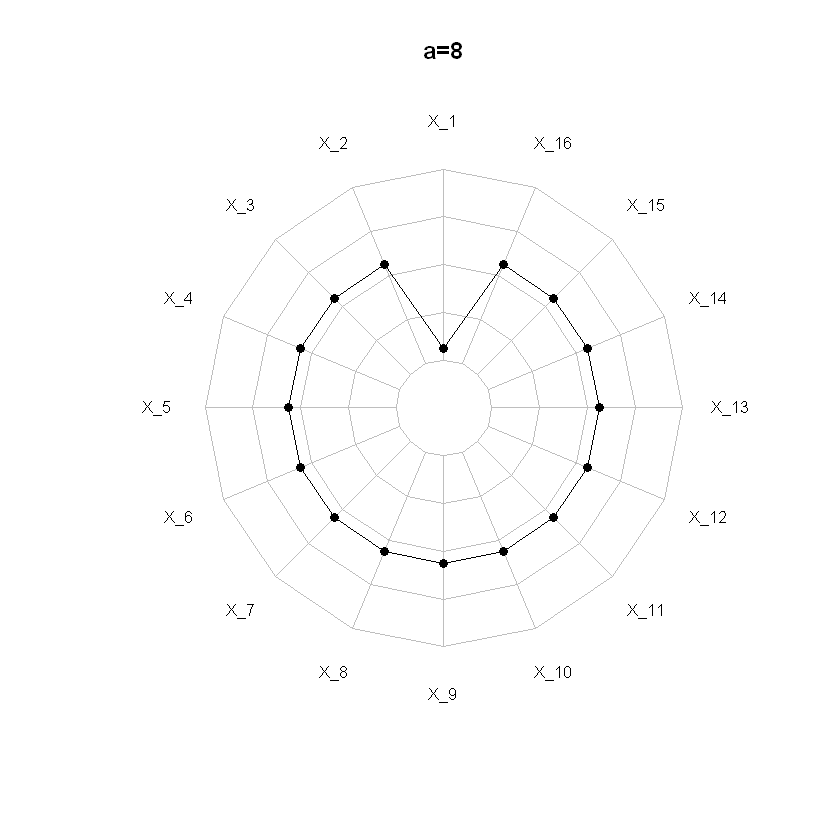

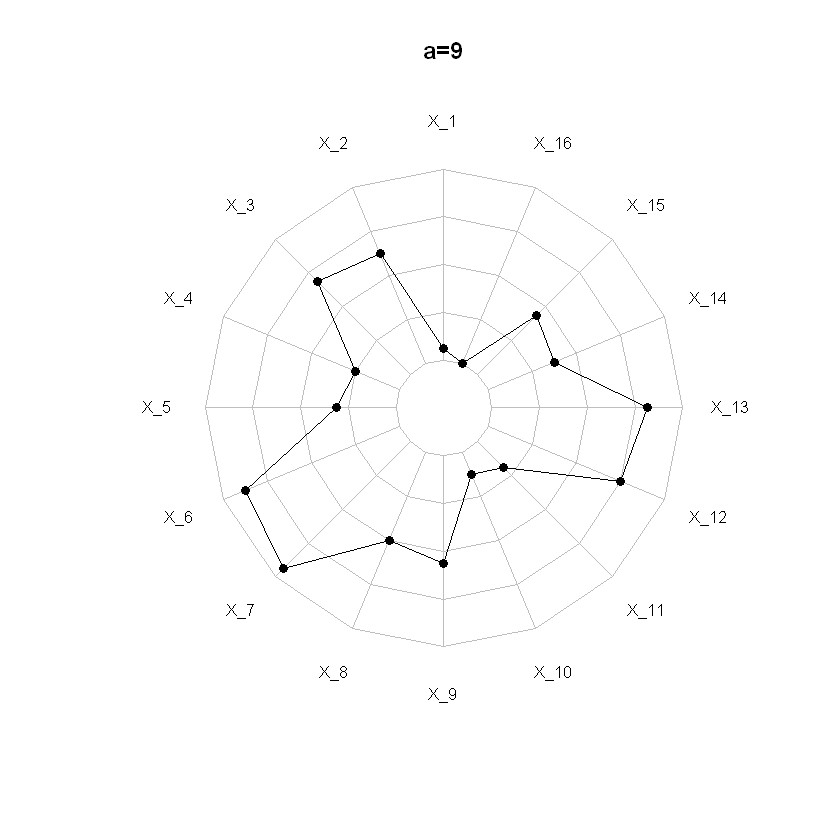

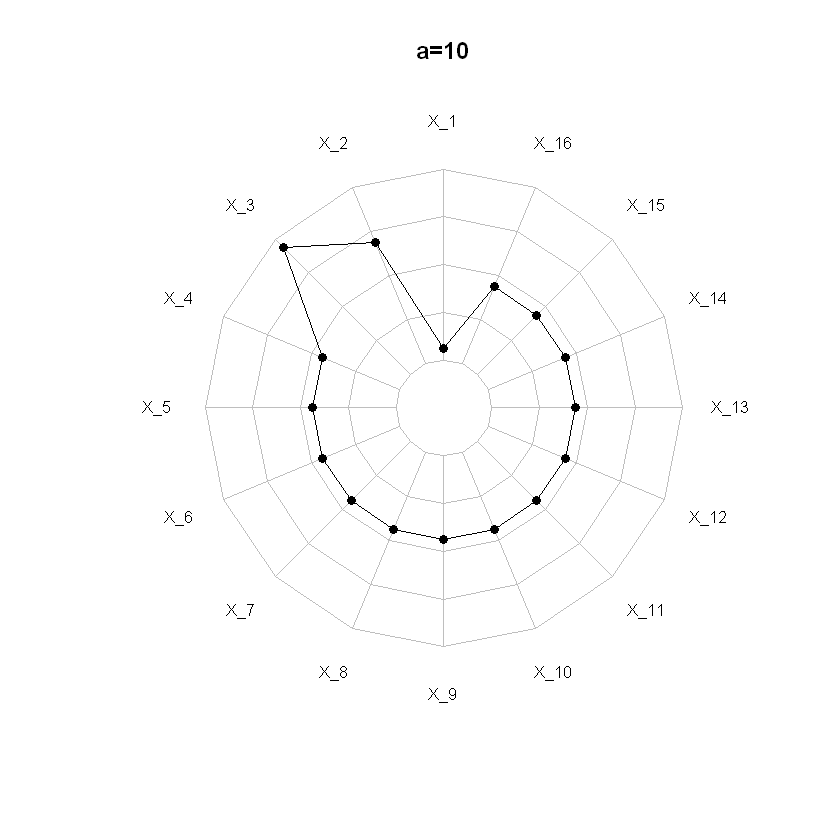

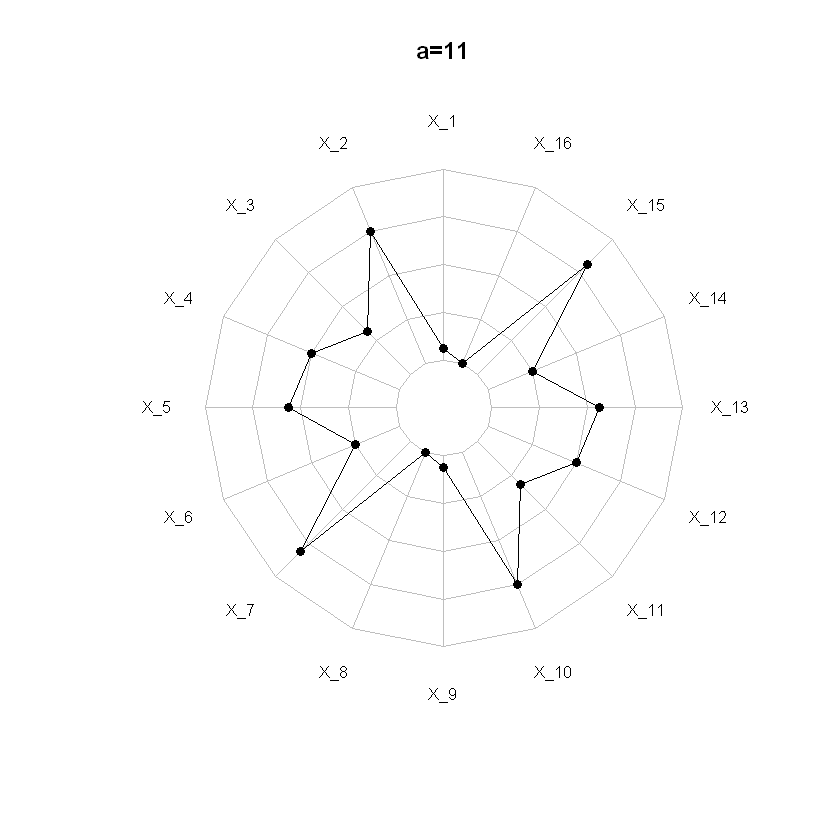

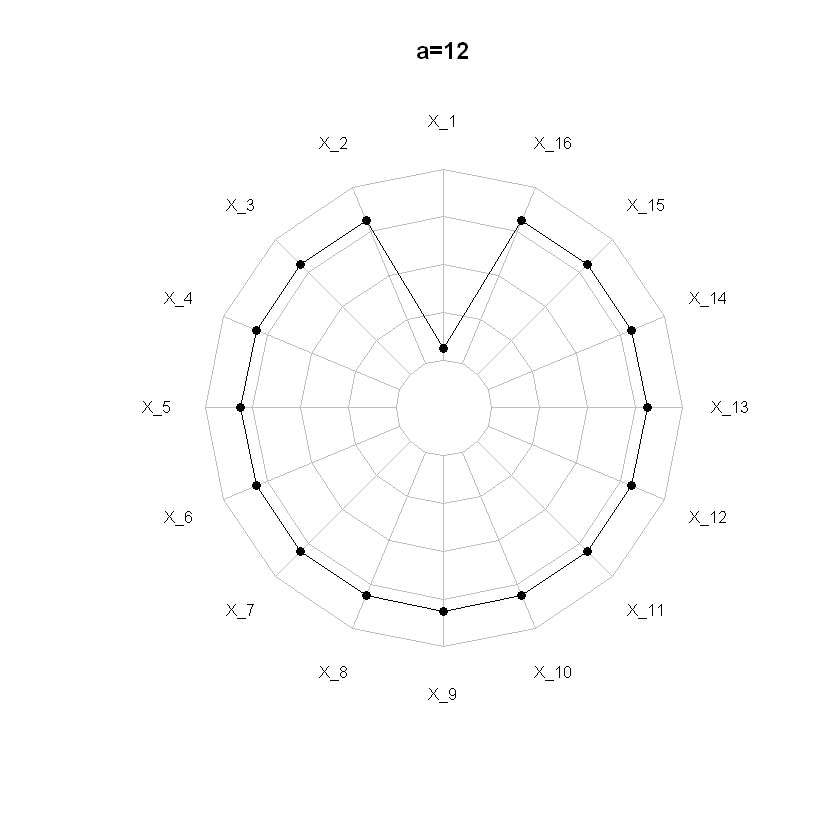

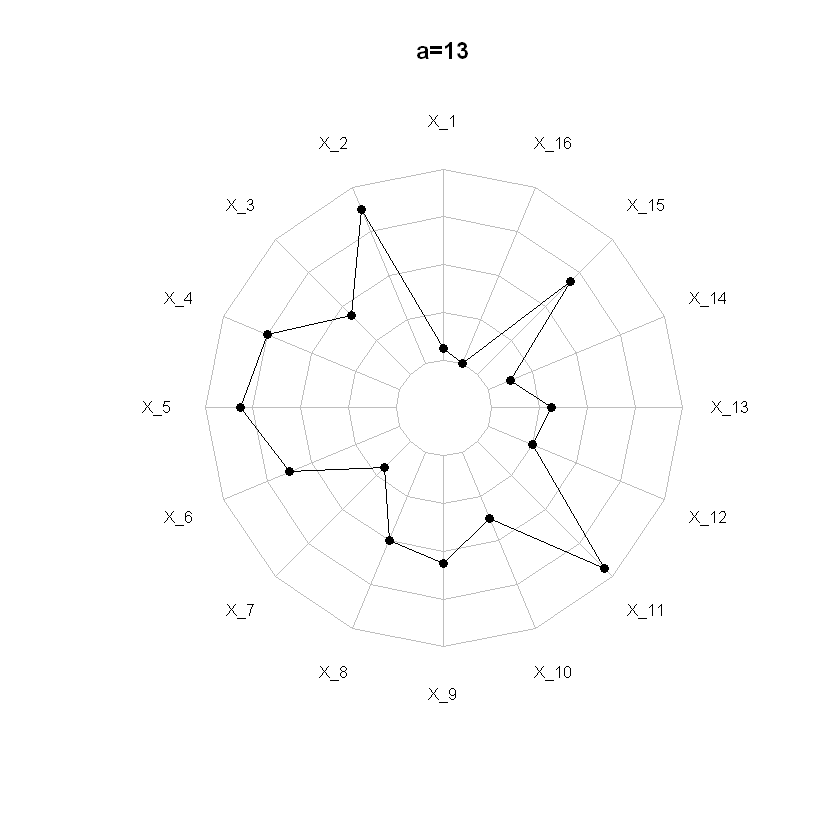

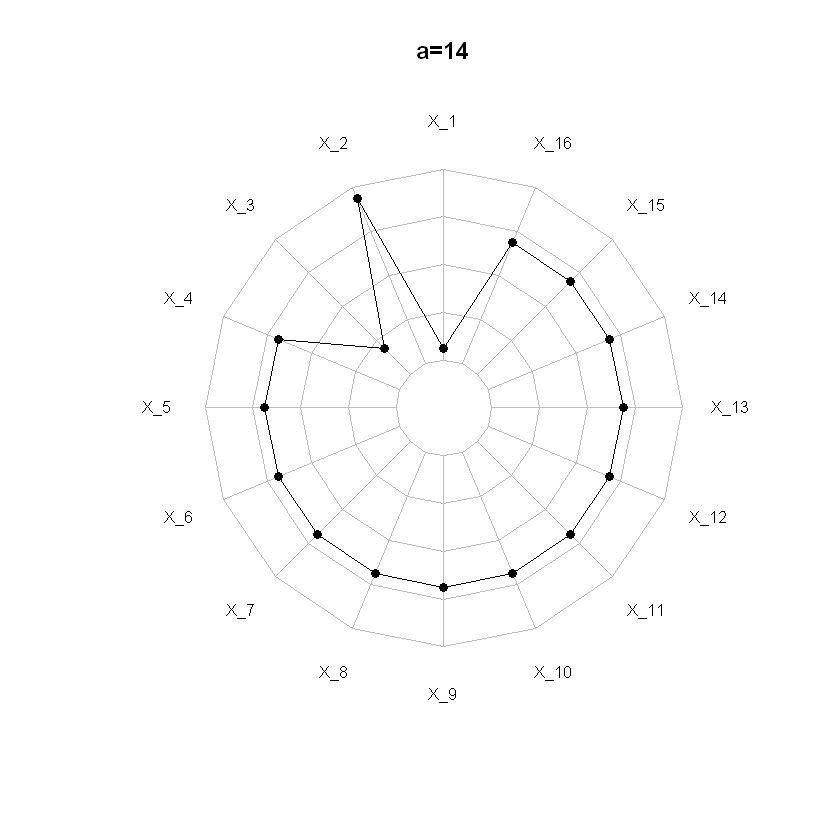

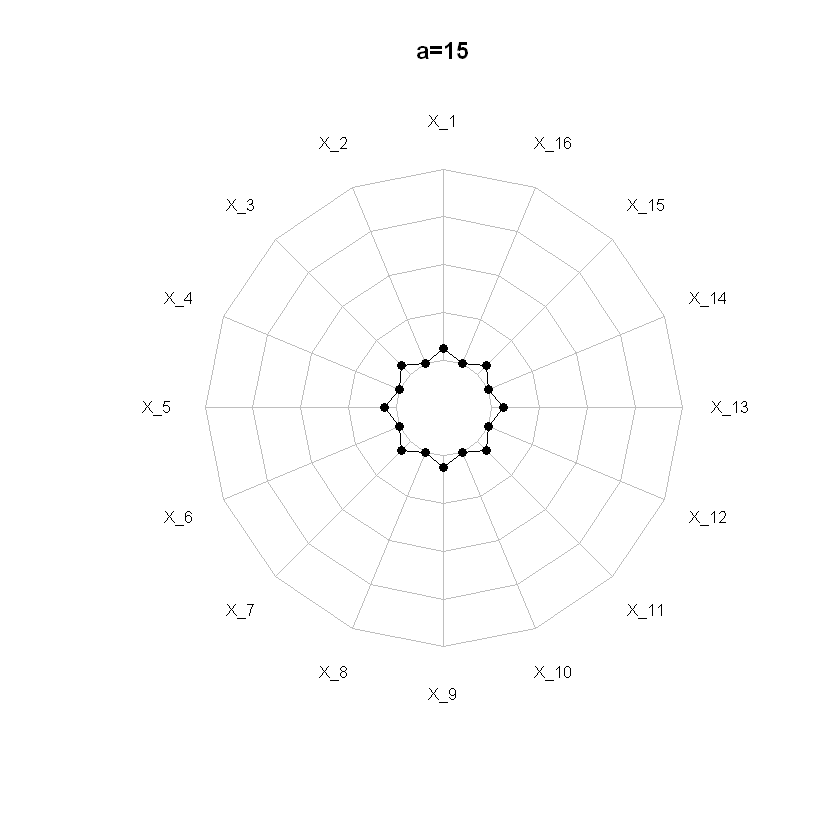

In [7]:
m = 16
x0 = 1
b = 1
n = 16

r = NULL
for (i in 3:15){
    r = rbind(r,lehmer_rng(n,m,i,b,x0))
}
r = as.data.frame(r)
for (i in 1:ncol(r)){
    colnames(r)[i] = paste("X_",as.character(i), sep="")
}
for (i in 1:nrow(r)){
    rownames(r)[i] = paste("a=",as.character(i+2), sep="")
}

df <- rbind(rep(16,16) , rep(0,16) , r)
df

for (i in 3:15){
    radarchart(df[c(1,2,i),],
            plwd=1 , plty=1,
            cglcol="grey", cglty=1, axislabcol="grey", 
            caxislabels=seq(0,16,5), cglwd=0.8, vlcex=0.8,
            title = paste('a=',as.character(i),sep = ""),
            
           )
}


In [8]:
c = NULL
for (i in 3:15){
    c = c(c,length(unique(as.numeric(df[i,]))))
}
cat('When a =')
which(c==max(c))+2

When a =

[1]  5  9 13

When a = 5, 9, 13, the obtained sequences have the largest periods.

## (c)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b=2,1,7,5,11,9,15,13,3,1,7,5,11,9,15,13,3
b=3,1,8,11,10,5,12,15,14,9,0,3,2,13,4,7,6
b=4,1,9,1,9,1,9,1,9,1,9,1,9,1,9,1,9
b=5,1,10,7,8,13,6,3,4,9,2,15,0,5,14,11,12
b=6,1,11,13,7,9,3,5,15,1,11,13,7,9,3,5,15
b=7,1,12,3,6,5,0,7,10,9,4,11,14,13,8,15,2
b=8,1,13,9,5,1,13,9,5,1,13,9,5,1,13,9,5


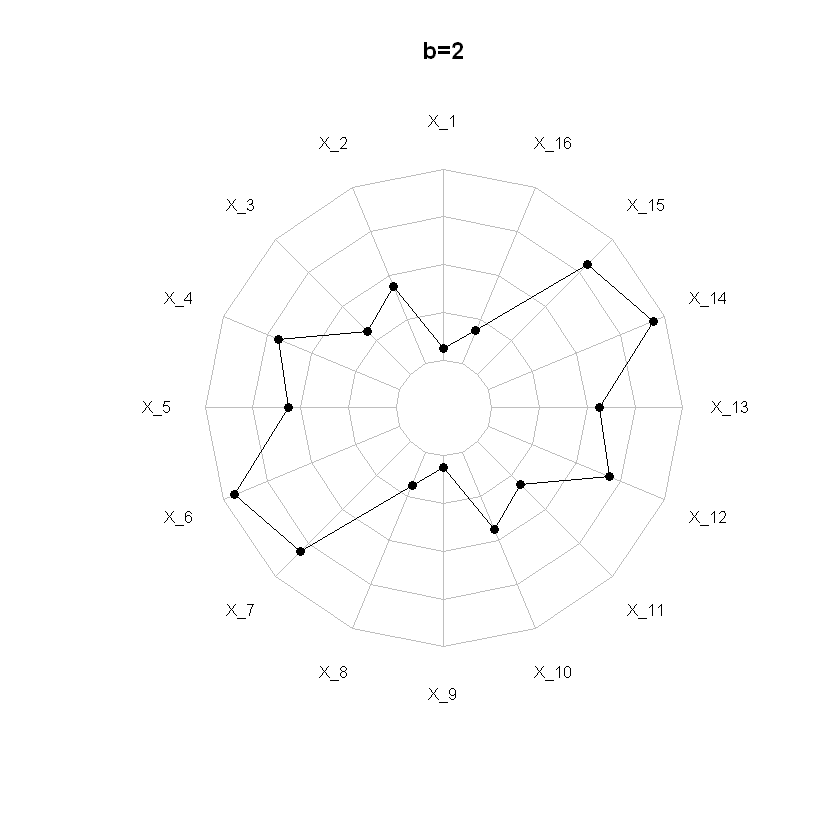

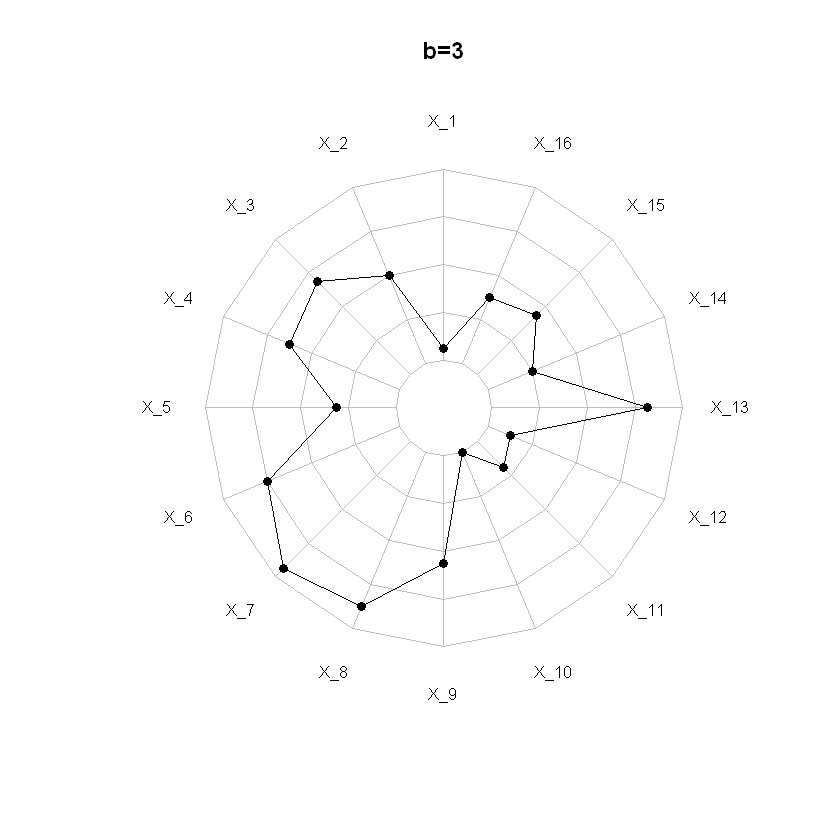

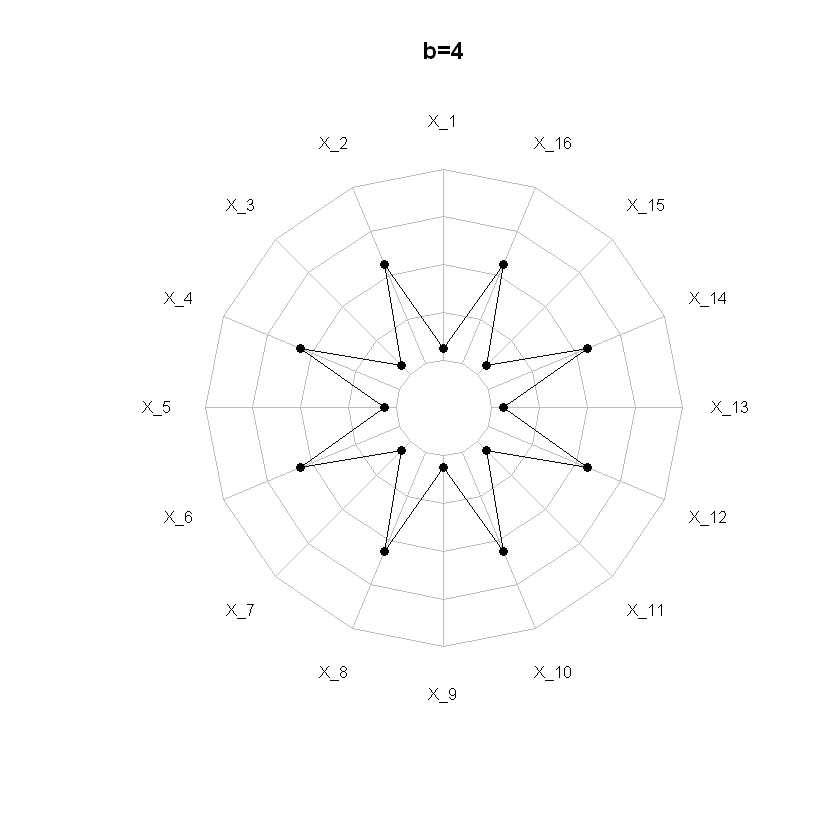

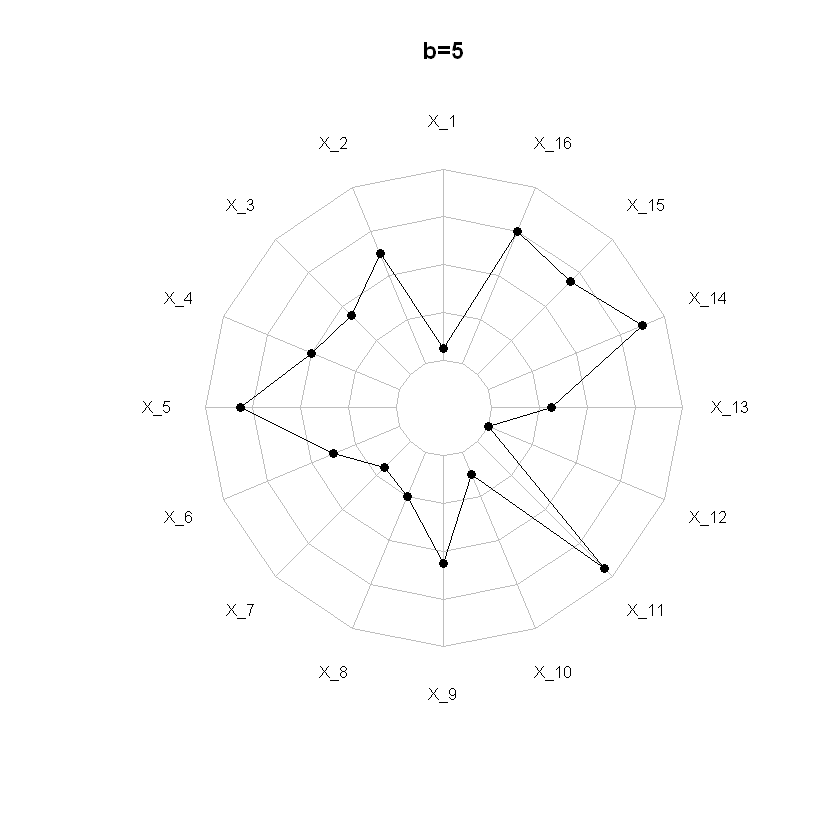

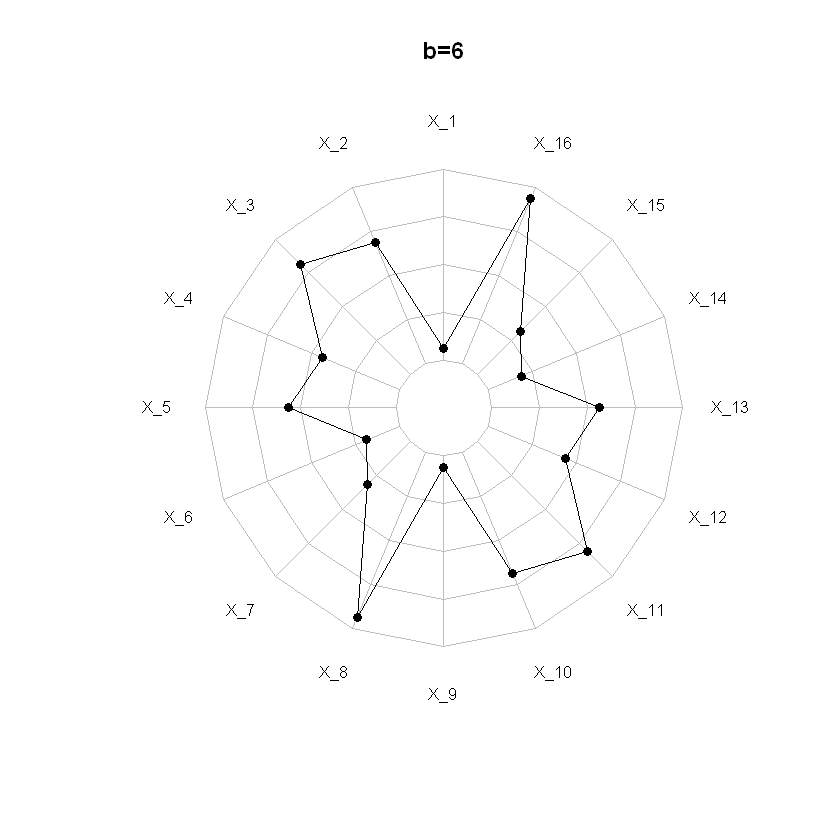

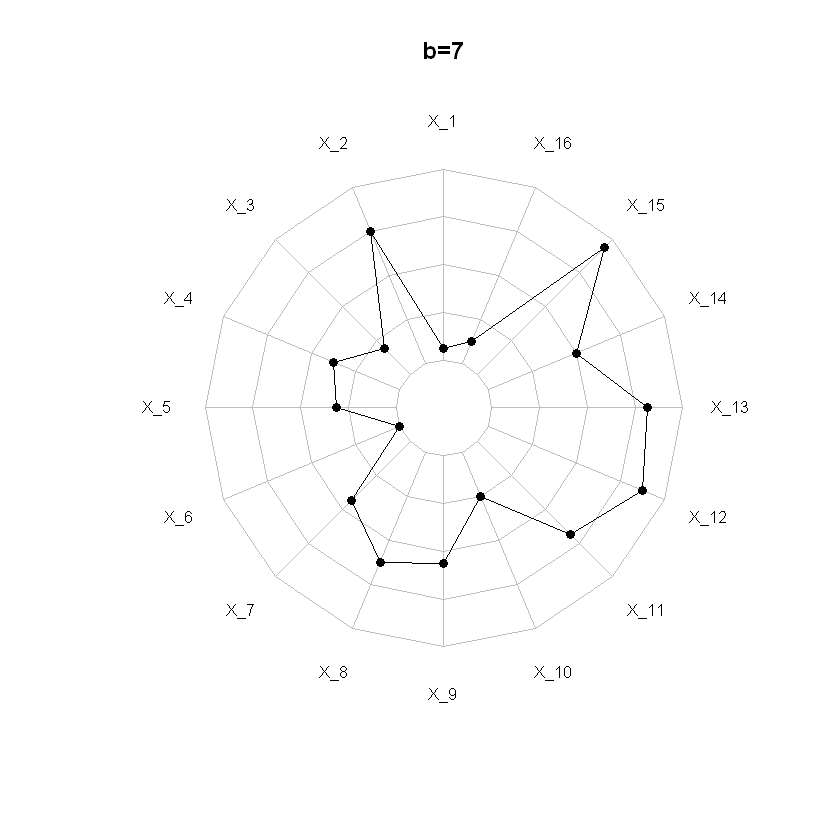

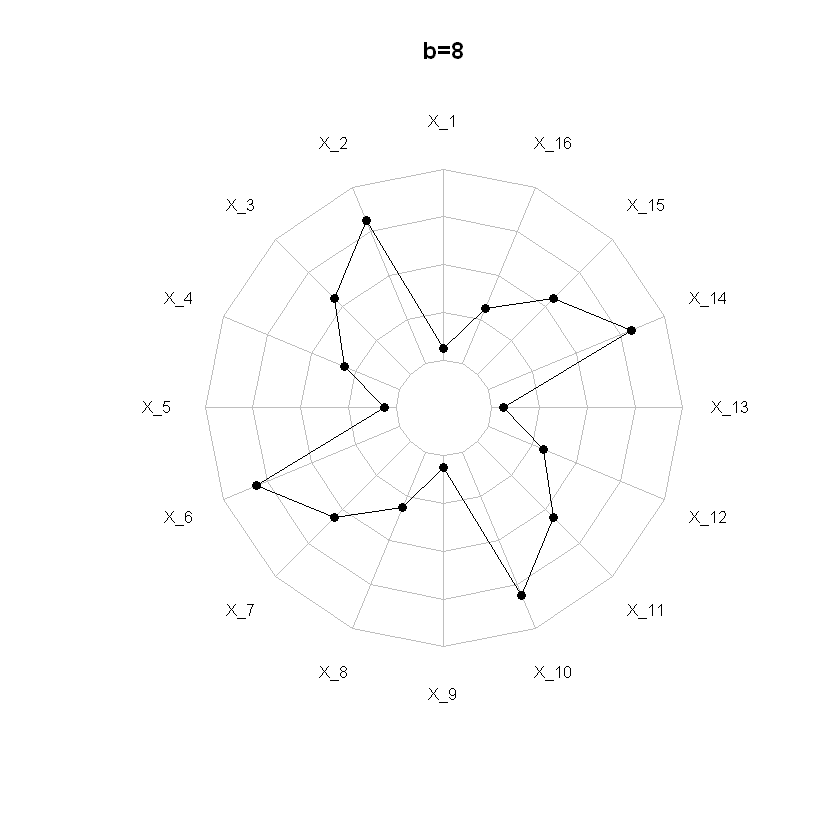

In [9]:
m = 16
x0 = 1
a = 5
n = 16

r = NULL
for (i in 2:8){
    r = rbind(r,lehmer_rng(n,m,a,i,x0))
}
r = as.data.frame(r)
for (i in 1:ncol(r)){
    colnames(r)[i] = paste("X_",as.character(i), sep="")
}
for (i in 1:nrow(r)){
    rownames(r)[i] = paste("b=",as.character(i+1), sep="")
}

df <- rbind(rep(16,16) , rep(0,16) , r)
df

for (i in 3:9){
    radarchart(df[c(1,2,i),],
            plwd=1 , plty=1,
            cglcol="grey", cglty=1, axislabcol="grey", 
            caxislabels=seq(0,16,5), cglwd=0.8, vlcex=0.8,
            title = paste('b=',as.character(i-1),sep = ""),
            
           )
}

In [10]:
c = NULL
for (i in 3:9){
    c = c(c,length(unique(as.numeric(df[i,]))))
}
cat('When b =')
which(c==max(c))+1

When b =

[1] 3 5 7

When b = 3, 5, 7, the obtained sequences have the largest periods.

## (d)

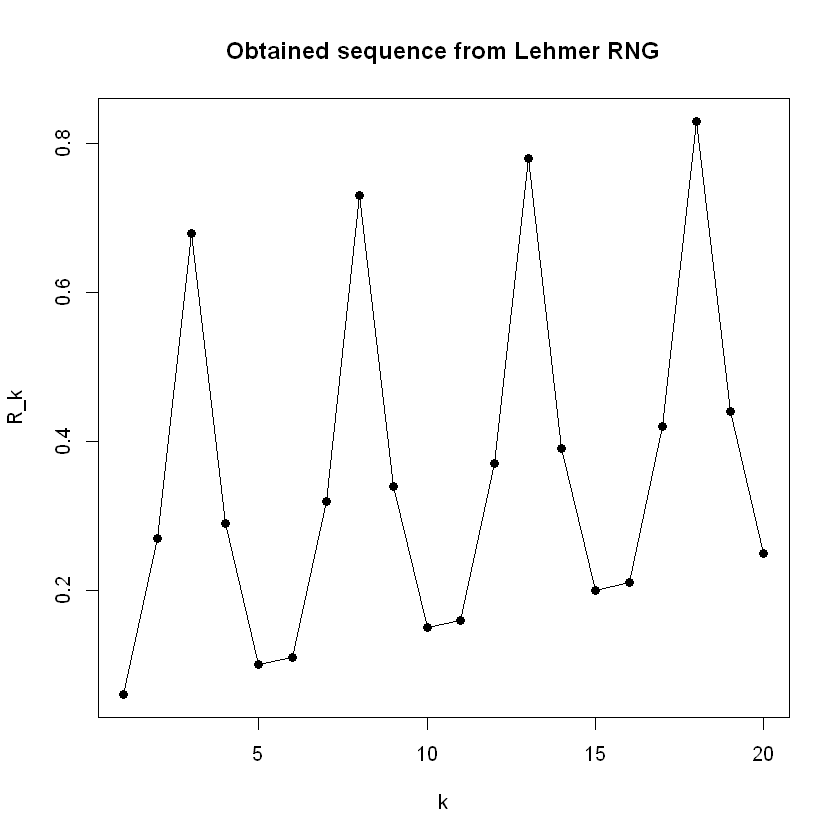

In [30]:
m = 100
x0 = 6
a = 21
b = 1
n = 20
res_lehmer_1 = lehmer_rng(n,m,a,b,x0)/m
plot(res_lehmer_1,pch = 16, xlab = "k", ylab = "R_k", main = 'Obtained sequence from Lehmer RNG')
lines(res_lehmer_1)

It has an obvious pattern, thus is not a good RNG.

## (e)

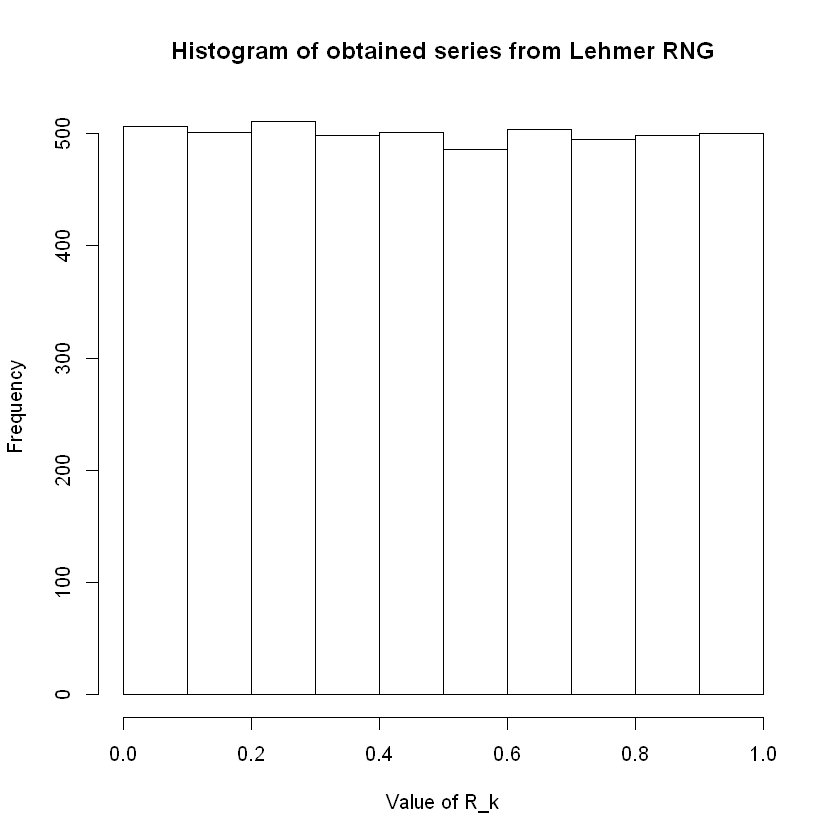

In [12]:
m = 2^11
x0 = 1
a = 1229
b = 1
n = 5000
res_lehmer_2 = lehmer_rng(n,m,a,b,x0)/m
hist(res_lehmer_2, main = 'Histogram of obtained series from Lehmer RNG', xlab = 'Value of R_k')

The shape of the histogram suggests that the obtained random series has $U(0,1)$ uniform distribution.

## (f)

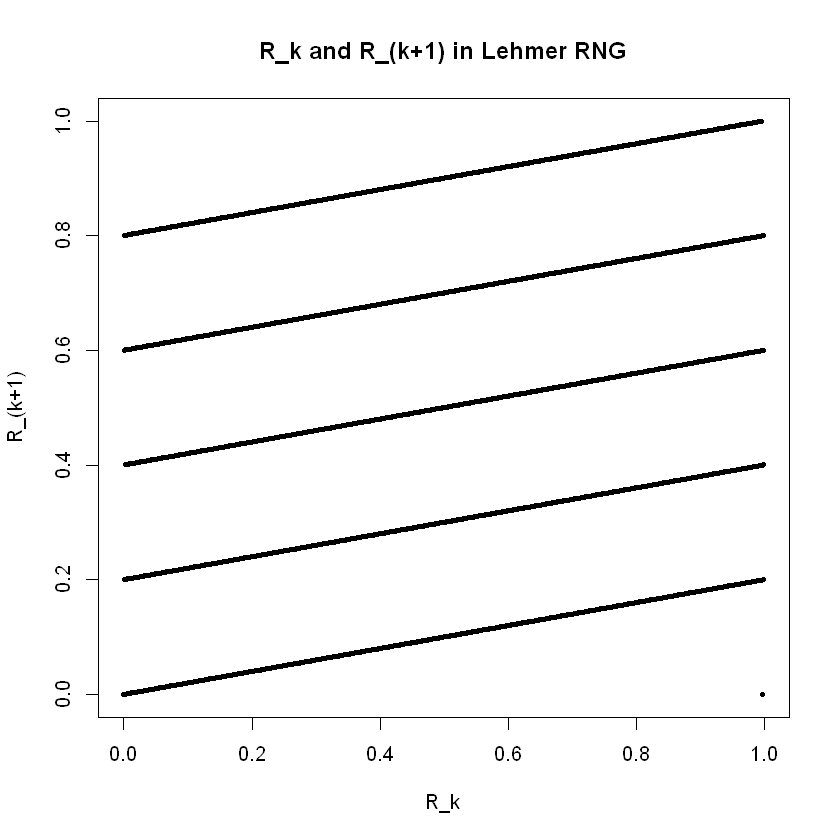

In [13]:
cc = matrix(0,length(res_lehmer_2)-1,2)
for (i in 1:(length(res_lehmer_2)-1)){
    cc[i,1] = res_lehmer_2[i]
    cc[i,2] = res_lehmer_2[i+1]
}
plot(cc[,1],cc[,2], pch = 16, cex = .5, xlab = 'R_k', ylab = 'R_(k+1)', main = 'R_k and R_(k+1) in Lehmer RNG')

Conclusion: Even the the histogram shows that the obtained sequence is close to $U(0,1)$ distribution, the scatter plot shows that there is relationship between successive elements. It might not be good RNG.

## (g)

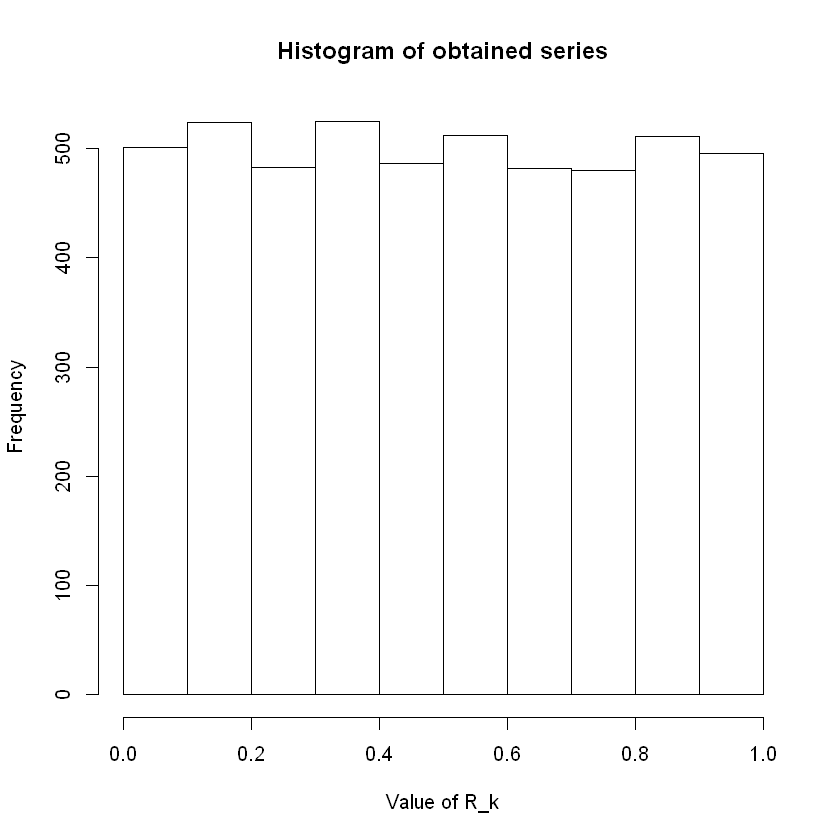

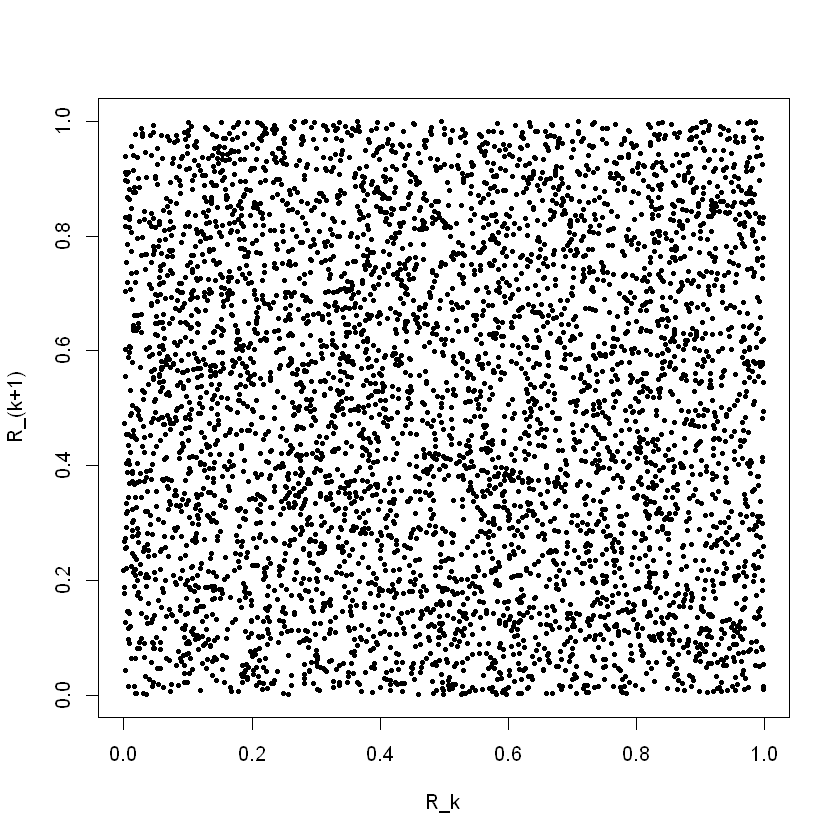

In [14]:
m = 244944
x0 = 1
a = 1597
b = 51749
n = 5000
res_lehmer_3 = lehmer_rng(n,m,a,b,x0)/m
hist(res_lehmer_3, main = 'Histogram of obtained series', xlab = 'Value of R_k')
cc = matrix(0,length(res_lehmer_3)-1,2)
for (i in 1:(length(res_lehmer_3)-1)){
    cc[i,1] = res_lehmer_3[i]
    cc[i,2] = res_lehmer_3[i+1]
}
plot(cc[,1],cc[,2], pch = 16, cex = .5, xlab = 'R_k', ylab = 'R_(k+1)')

Conclusion: The new set parameters improve the quality of Lehmer’s RNG, as the scatter plot of $R_k$ and $R_{k+1}$ looks more random.

## (h)

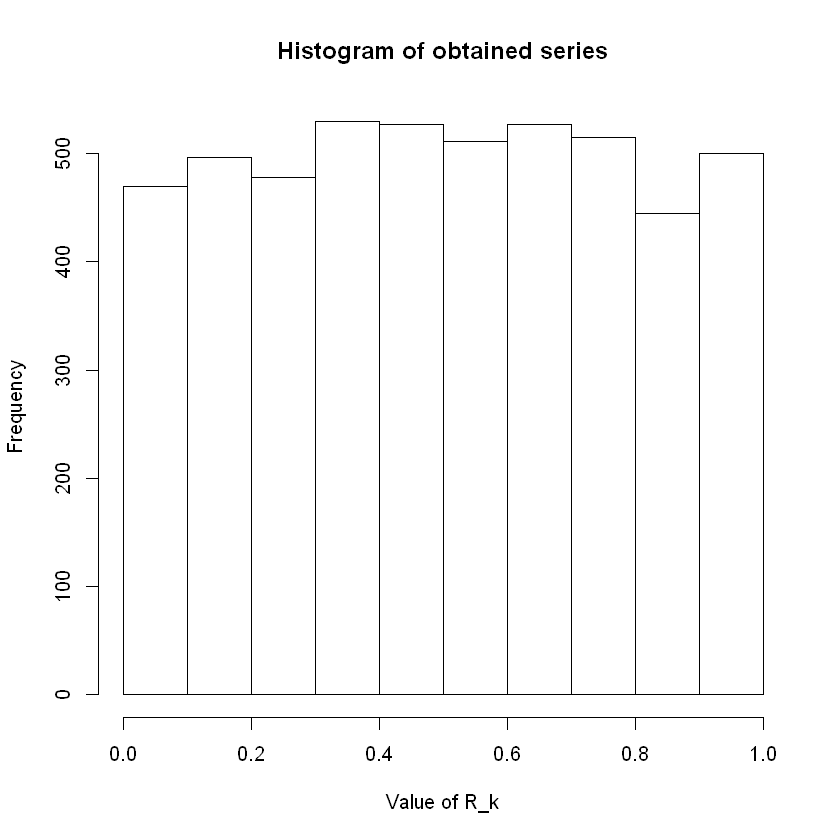

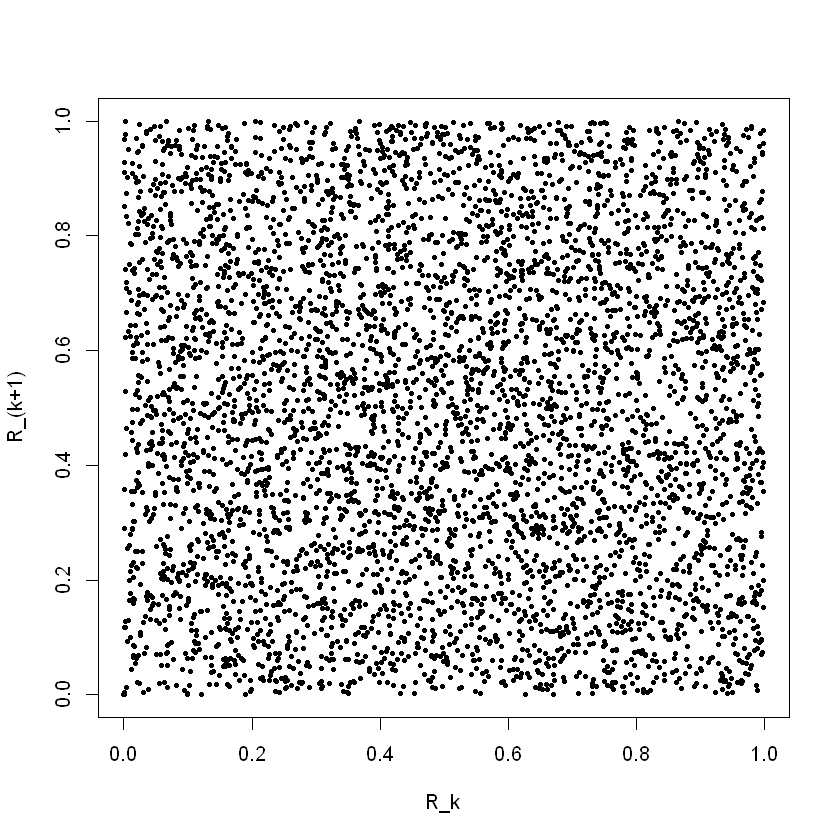

In [15]:
m = 2^31
x0 = 1
a = 2^16+3
b = 0
n = 5000
res_randu = lehmer_rng(n,m,a,b,x0)/m
hist(res_randu, main = 'Histogram of obtained series', xlab = 'Value of R_k')
cc = matrix(0,length(res_randu)-1,2)
for (i in 1:(length(res_randu)-1)){
    cc[i,1] = res_randu[i]
    cc[i,2] = res_randu[i+1]
}
plot(cc[,1],cc[,2], pch = 16, cex = .5, xlab = 'R_k', ylab = 'R_(k+1)')

From the histogram and scatterplot, it could be said that RANDU is a good RNG.

## (i)

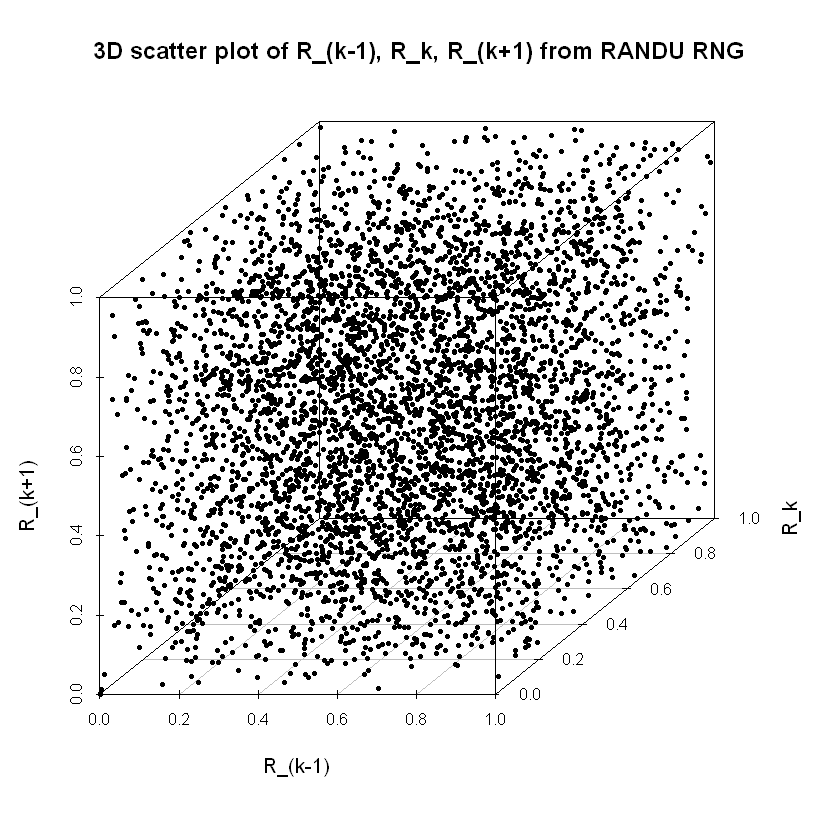

In [26]:
cc = matrix(0,length(res_randu)-2,3)
for (i in 1:(length(res_randu)-2)){
    cc[i,1] = res_randu[i]
    cc[i,2] = res_randu[i+1]
    cc[i,3] = res_randu[i+2]
}
scatterplot3d(cc[,1:3], main = '3D scatter plot of R_(k-1), R_k, R_(k+1) from RANDU RNG',
             xlab = 'R_(k-1)',
             ylab = 'R_k',
             zlab = 'R_(k+1)',
             pch = 16, cex.symbols=.5)

<img src="cp3_3dscp.png">

By rotating the image, some layers of points can be seen, there are some relationships among $R_{K-1}, R_{K}, R_{K+1}$. The 3D scatter plot suggests that RANDU is still not good enough.